In [1]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('big_data_mart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Replacing The Column Values

In [5]:
df.replace(to_replace =['LF','low fat'],
           value ='Low Fat',inplace=True)
df.replace(to_replace =['reg'],
           value ='Regular',inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

List1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in List1:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

In [9]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Replaced the NaN Values of Categorical Date with Mode and Numberical NaN Value by Mean
df=df.replace(np.NaN,df['Item_Weight'].mean())
df=df.replace(np.NaN,df['Outlet_Size'].mode())
df.isnull().sum()
#NaN Value is treated

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

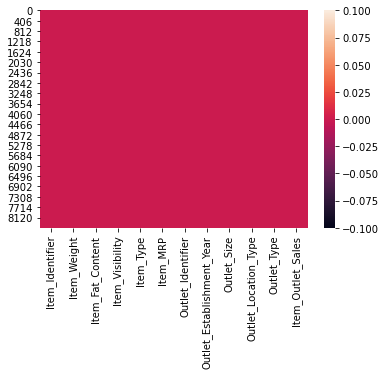

In [12]:
sb.heatmap(df.isnull())

No Null Values Observed

Correlation

In [13]:
dfcor=df.corr()
dfcor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.001365,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


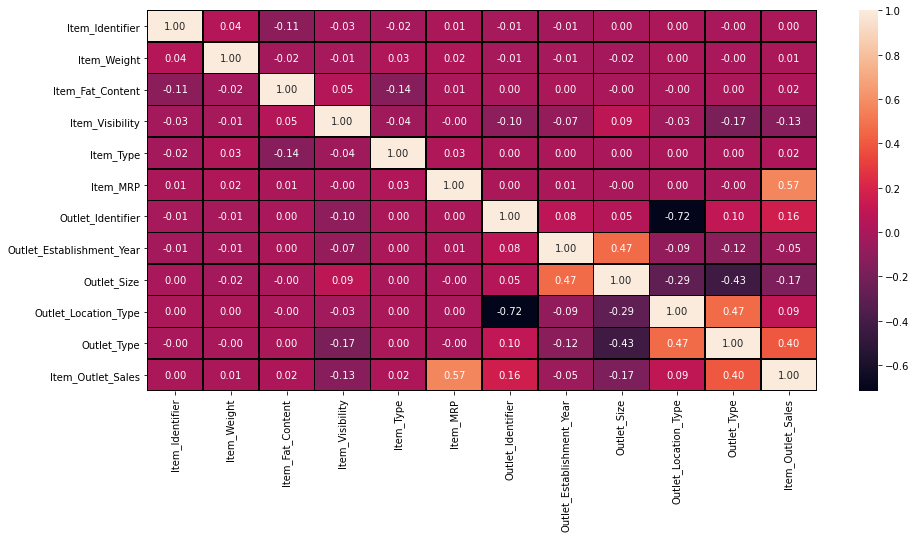

In [14]:
corr=df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

Sale are having correlation with Outlet type, Item MRP, Outlet Identifier, Outlet Location

In [15]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


No Much Difference in Mean and Median

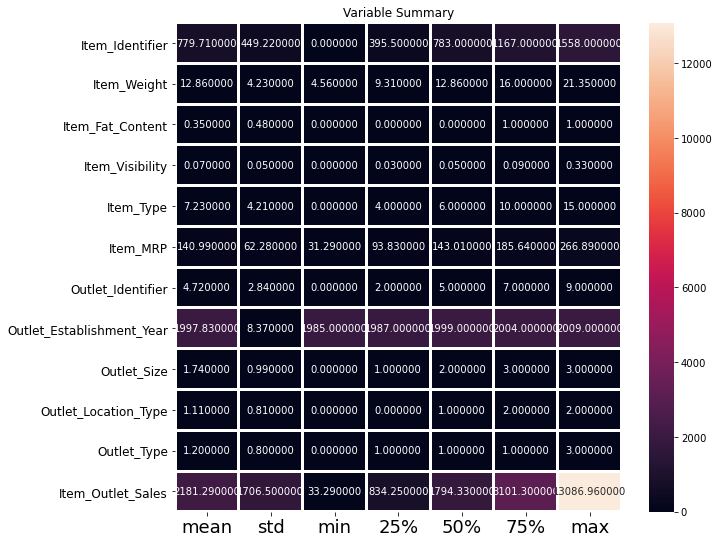

In [16]:
plt.figure(figsize=(10,9))
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outlier Checking:

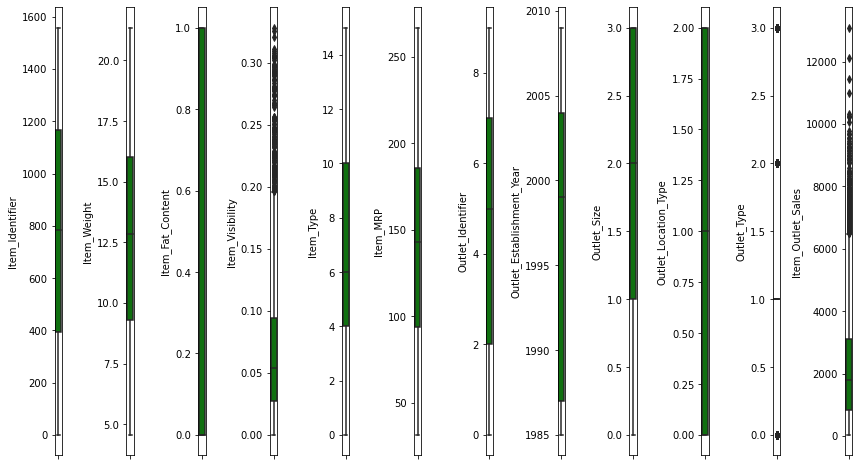

In [17]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Item Visibility, Outlet Type and Outlet Sales are having outliers

Skewness

In [18]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Outcomes of Skewness: I have taken thresold value of skewness +/- .65. Columns having high skewness are:
           Item_Visibility
           Outlet_Type 
           Item_Outlet_Sales

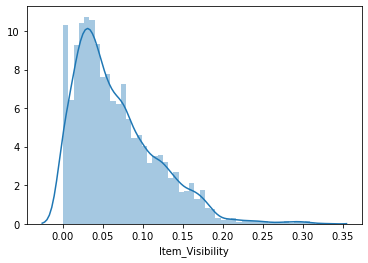

In [19]:
sb.distplot(df["Item_Visibility"])

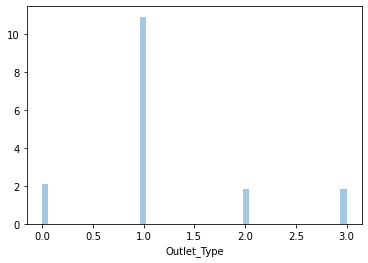

In [20]:
sb.distplot(df["Outlet_Type"])

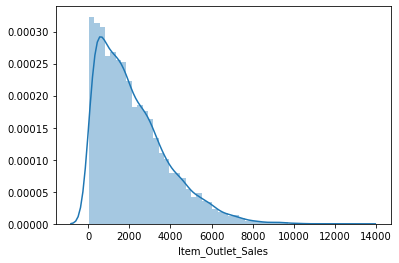

In [21]:
sb.distplot(df["Item_Outlet_Sales"])

Data is not normalised. The normal distribution curve of outcome is irrelevent

Removing Outlier

In [22]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8523, 12)

In [23]:
thresold =3 
print (np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [24]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print (df_new.shape)

(8523, 12)
(8338, 12)


In [25]:
loss_percentage=(8523-8338)/8523*100
print (loss_percentage)

2.170597207556025


In [26]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [27]:
y=df_new.iloc[:,-1]

In [28]:
x=df_new.iloc[:,0:-1]

Transforming Data To Remove Skewness

In [29]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.73355825,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.73355825,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.73355825,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  0.27570893,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.73355825,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  0.27570893,
        -1.37581641, -0.13467763]])

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-1.45970155, -0.81707423, -0.73664489, ..., -0.73355825,
        -1.37581641, -0.13467763],
       [-2.09372018, -1.72477171,  1.35750619, ..., -0.73355825,
         1.09508924,  1.05688633],
       [-0.15407347,  1.07938519, -0.73664489, ..., -0.73355825,
        -1.37581641, -0.13467763],
       ...,
       [ 1.20238359, -0.49268289, -0.73664489, ...,  0.27570893,
        -0.12639076, -0.13467763],
       [-0.11269957, -1.36554488,  1.35750619, ..., -0.73355825,
         1.09508924,  1.05688633],
       [-1.86156141,  0.48935138, -0.73664489, ...,  0.27570893,
        -1.37581641, -0.13467763]])

We Will Use Linear Regression as the Sales keeps on changing with Influenceing parameters

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

max_scr=0
for i in range(0,6000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)
        

At Random State 21 . The Model Is Performing Very Well
At Random State:- 21
At Random State 176 . The Model Is Performing Very Well
At Random State:- 176
At Random State 213 . The Model Is Performing Very Well
At Random State:- 213
At Random State 261 . The Model Is Performing Very Well
At Random State:- 261
At Random State 1043 . The Model Is Performing Very Well
At Random State:- 1043
At Random State 1074 . The Model Is Performing Very Well
At Random State:- 1074
At Random State 2240 . The Model Is Performing Very Well
At Random State:- 2240
At Random State 2280 . The Model Is Performing Very Well
At Random State:- 2280
At Random State 2910 . The Model Is Performing Very Well
At Random State:- 2910
At Random State 3184 . The Model Is Performing Very Well
At Random State:- 3184
At Random State 3373 . The Model Is Performing Very Well
At Random State:- 3373
At Random State 3646 . The Model Is Performing Very Well
At Random State:- 3646
At Random State 4747 . The Model Is Performing Ver

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=21) #Random state = 21

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


Regularisation

In [34]:
#Lasso Regression
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [55]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 51.14360035619276
R2_score is :- 50.82521021468575


At CV :- 3
Cross Validation Score is :- 51.22278665709573
R2_score is :- 50.82521021468575


At CV :- 4
Cross Validation Score is :- 51.17781705468094
R2_score is :- 50.82521021468575


At CV :- 5
Cross Validation Score is :- 51.23028798613579
R2_score is :- 50.82521021468575


At CV :- 6
Cross Validation Score is :- 51.230138063041565
R2_score is :- 50.82521021468575


At CV :- 7
Cross Validation Score is :- 51.27320126300745
R2_score is :- 50.82521021468575


At CV :- 8
Cross Validation Score is :- 51.23281830683859
R2_score is :- 50.82521021468575


At CV :- 9
Cross Validation Score is :- 51.227389229691
R2_score is :- 50.82521021468575




In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 826.7709650844241
Mean Square Error: 1157227.6760000607
Root Mean Sqaured Error: 1075.7451724270302


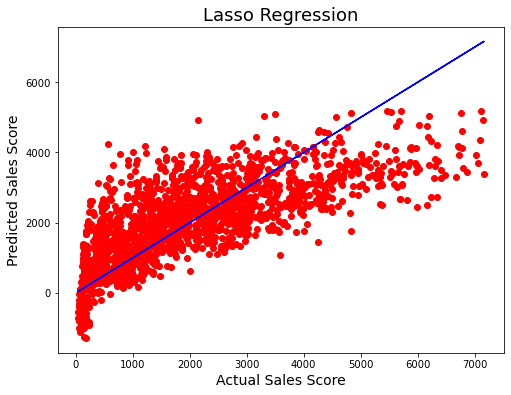

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Score',fontsize=14)
plt.ylabel('Predicted Sales Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [38]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [56]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 13.088058842622841
Cross Val Score: 13.218576705027152


In [41]:
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 826.7709650844241
Mean Square Error: 1157227.6760000607
Root Mean Sqaured Error: 1075.7451724270302


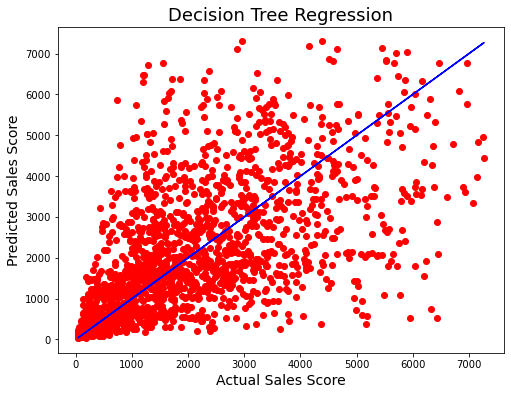

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Score',fontsize=14)
plt.ylabel('Predicted Sales Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'n_estimators': 200}


In [58]:
rf=RandomForestRegressor(criterion='friedman_mse', splitter='random')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

TypeError: __init__() got an unexpected keyword argument 'splitter'

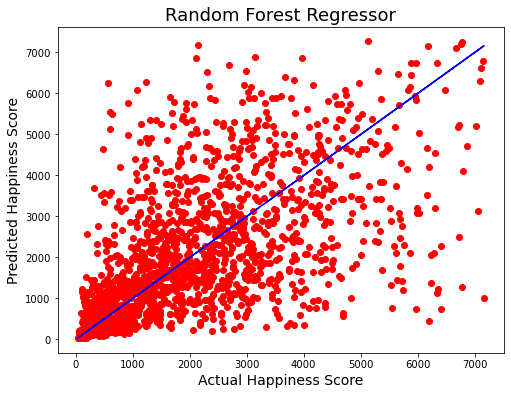

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

In [49]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 50}


In [61]:
gbr=GradientBoostingRegressor(criterion='mse', loss='ls',n_estimators=50)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_decision)
print("r2_score:",gbrs*100)
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',gbrc*100)


r2_score: 13.088058842622841
Cross Val Score: 58.69857021200713


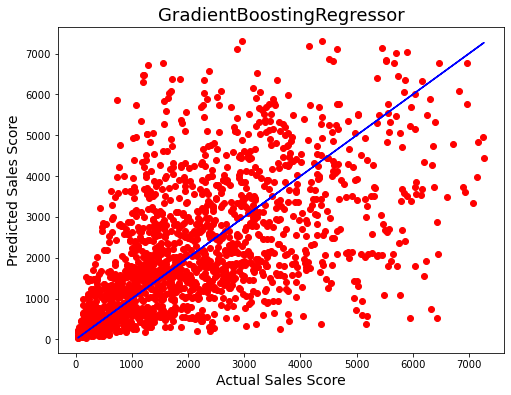

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Score',fontsize=14)
plt.ylabel('Predicted Sales Score',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [64]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'linear'}


In [66]:
sv=SVR(kernel='linear',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_decision)
print("r2_score:",svs*100)
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',svc*100)


r2_score: 13.088058842622841
Cross Val Score: 46.83261424896317


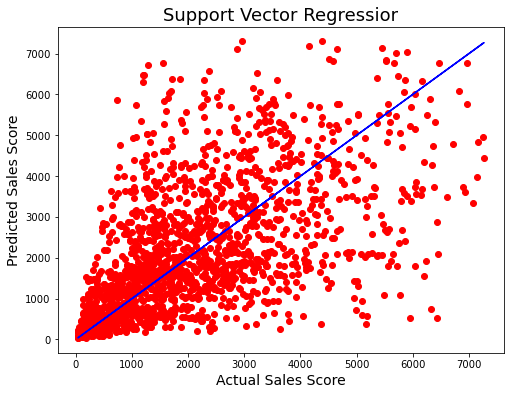

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Score',fontsize=14)
plt.ylabel('Predicted Sales Score',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

In [72]:
#We Will consider Lasso As Per Below Scores, Rest Score are not so Accurate whwn compare with Lasso
#At CV :- 7
#Cross Validation Score is :- 51.27320126300745
#R2_score is :- 50.82521021468575


In [74]:
import pickle
filename='Project_18.pkl'
pickle.dump(ls,open(filename,'wb'))

In [75]:
import numpy as np
a=np.array(y_test)
a

array([3615.294 ,   83.225 , 1930.82  , ..., 3775.086 , 2182.4924,
        307.5996])

In [76]:
df_com=pd.DataFrame({"Original":a,"Predicted":pred_ls},index=range(len(a)))
df_com

,Original,Predicted
0,3615.2940,3587.287544
1,83.2250,221.649747
2,1930.8200,1483.562135
3,1960.7810,1846.135034
4,1557.9720,858.896606
...,...,...
1663,1372.2138,2255.095766
1664,1731.7458,1553.687174
1665,3775.0860,3382.665341
1666,2182.4924,3196.186965
